### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


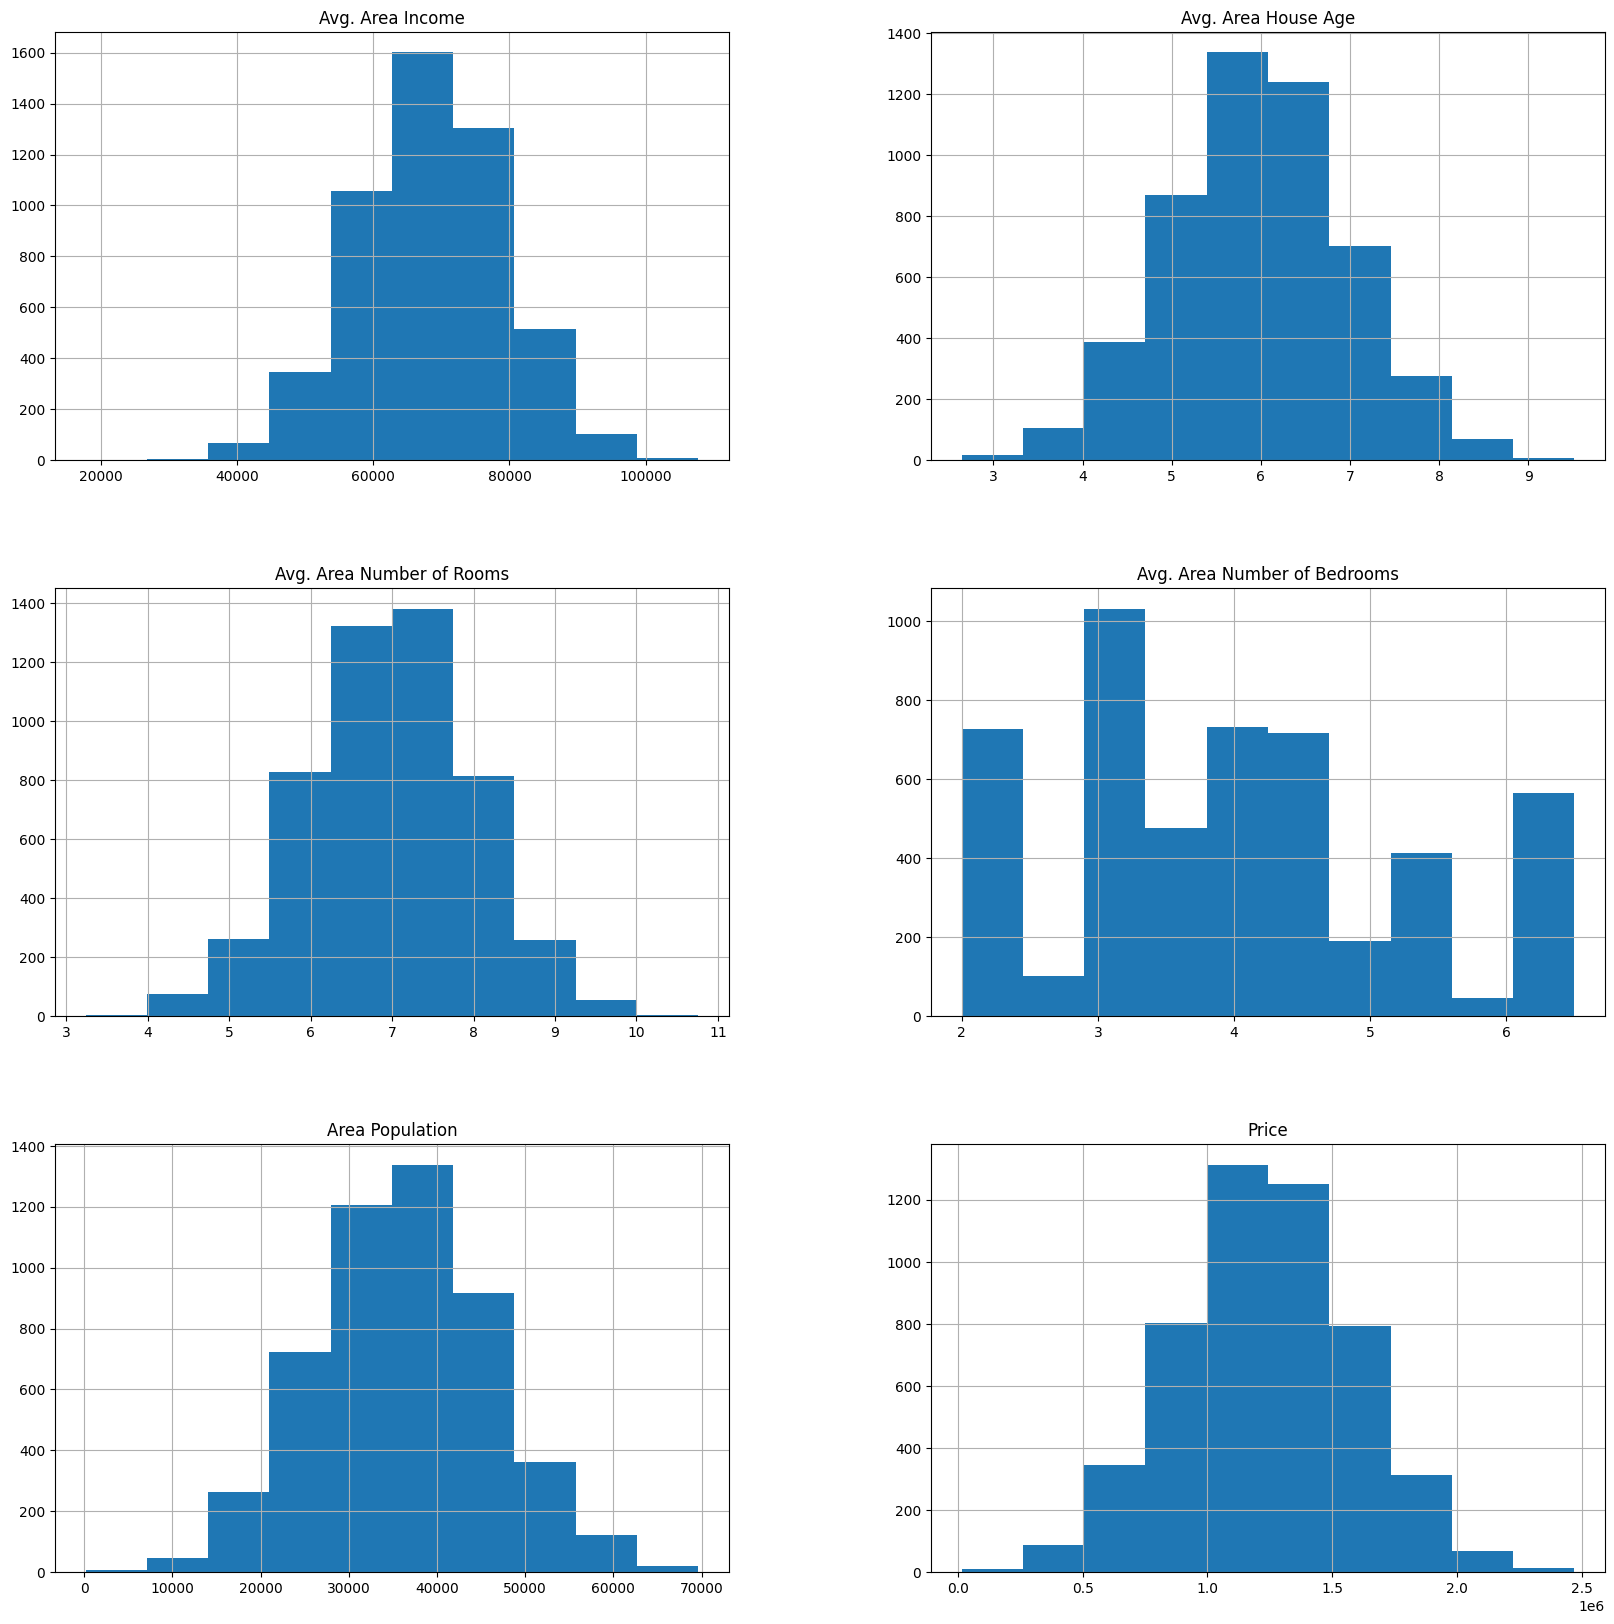

In [11]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

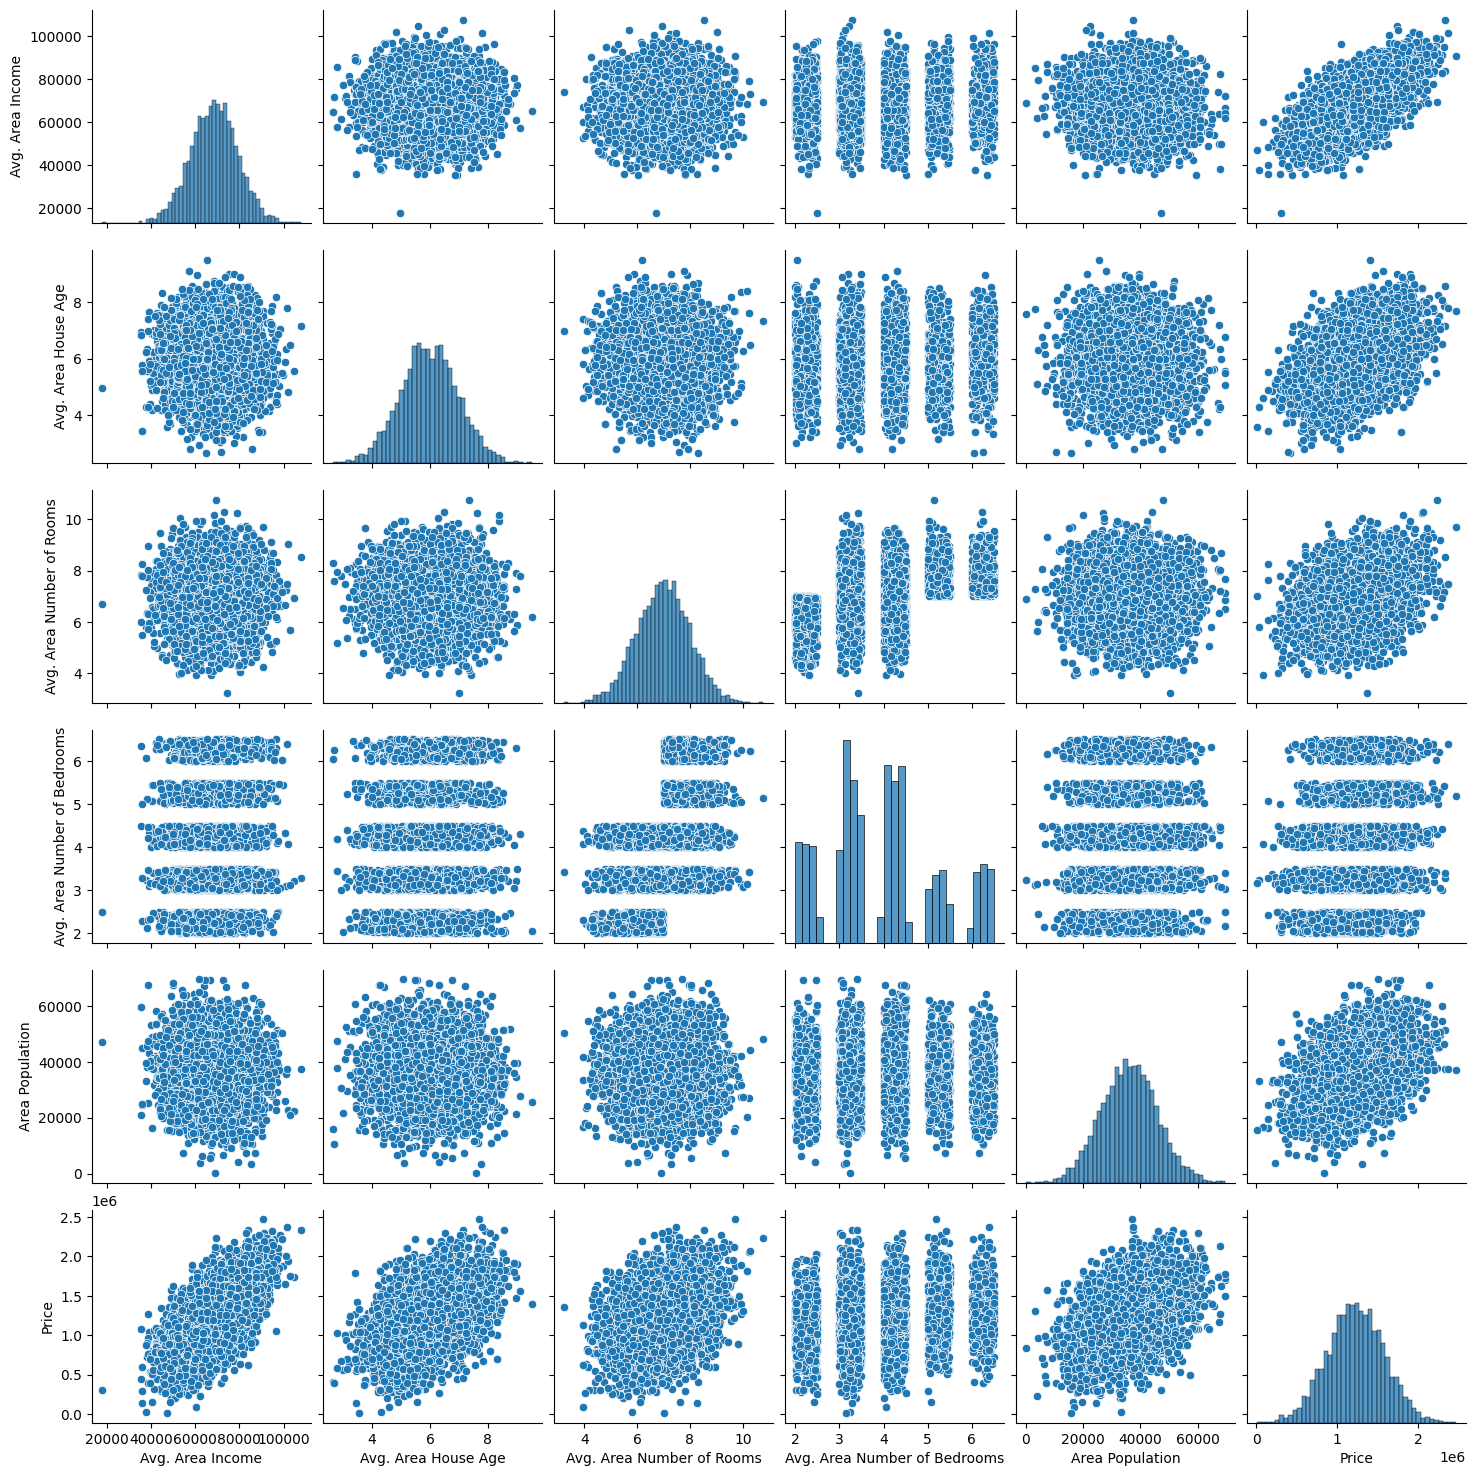

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

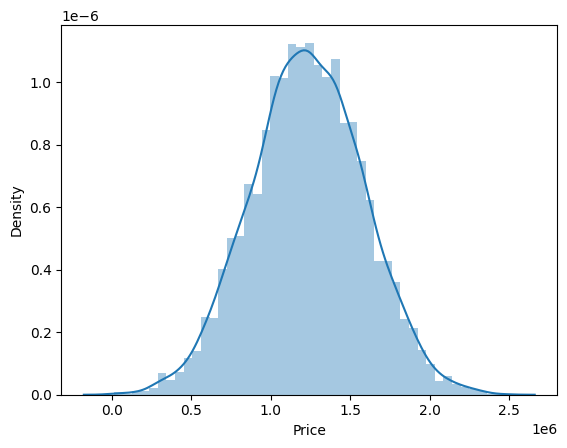

In [13]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

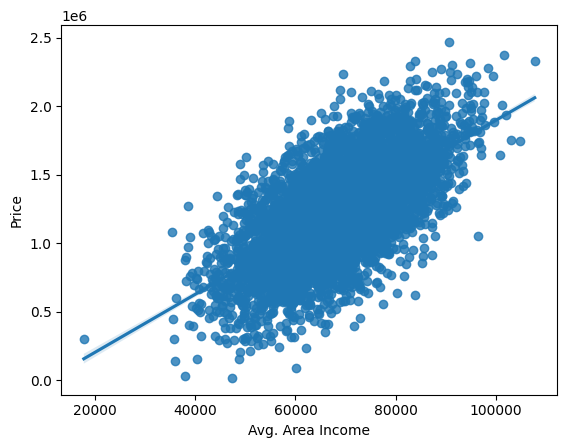

In [14]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [15]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

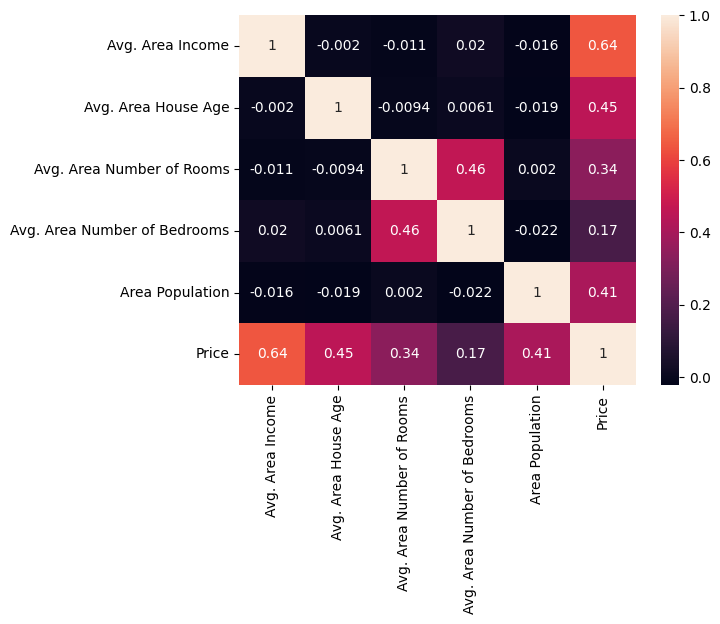

In [16]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [17]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

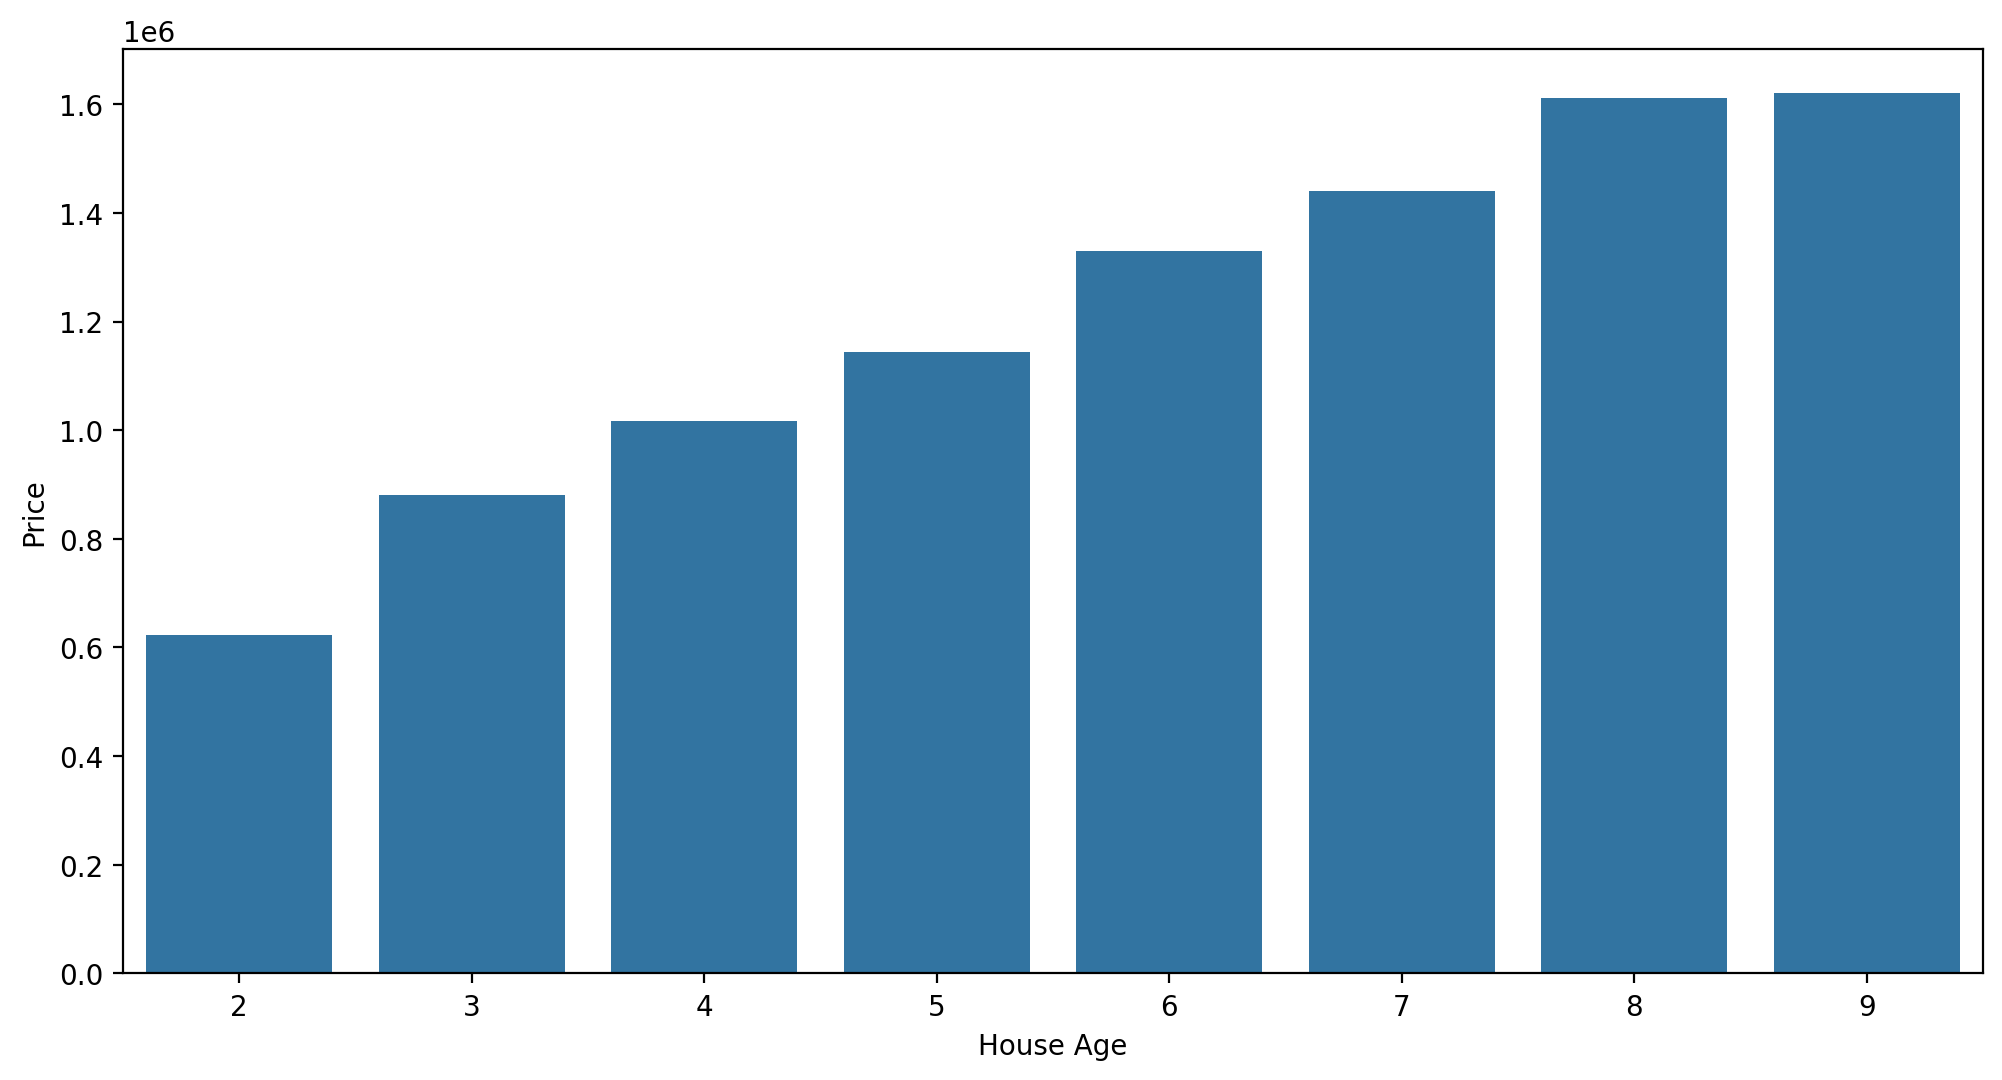

In [18]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [19]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

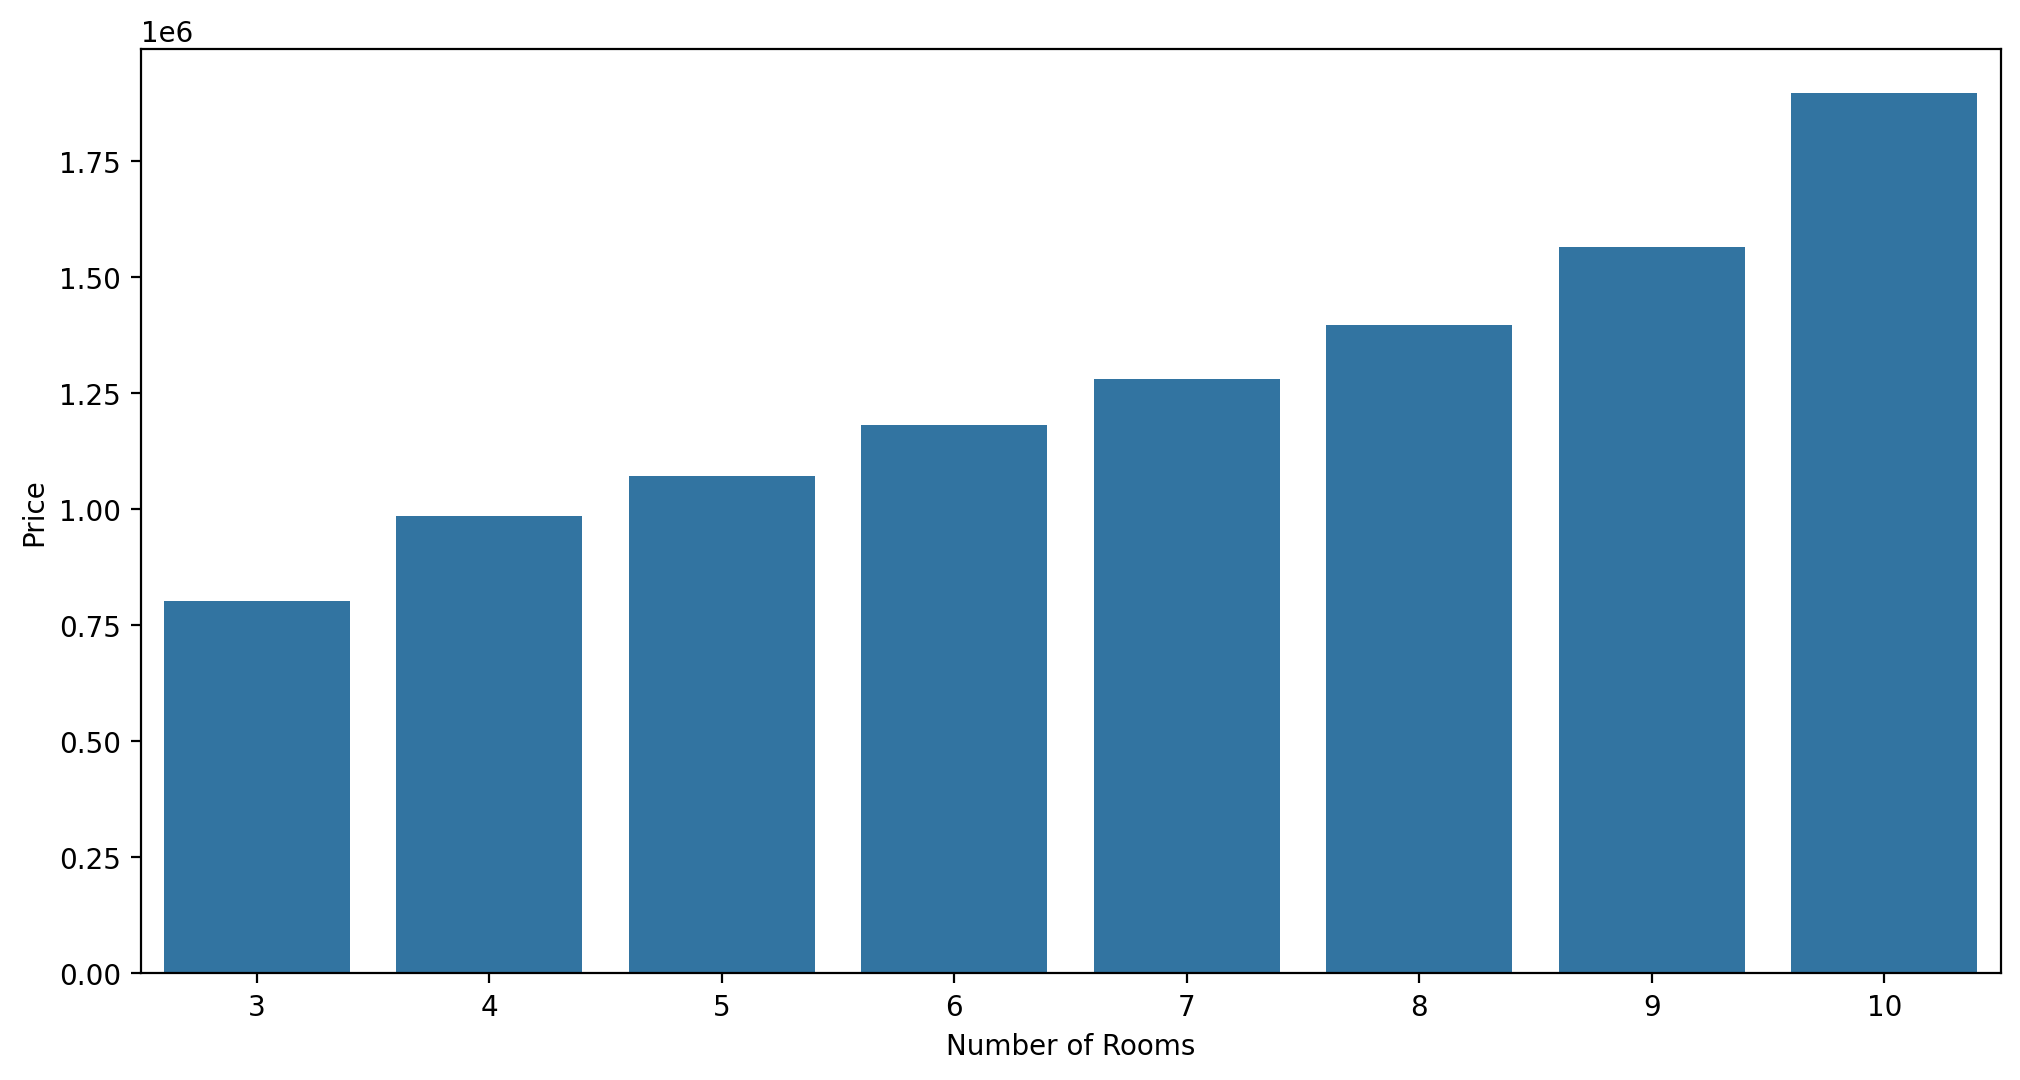

In [20]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [21]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

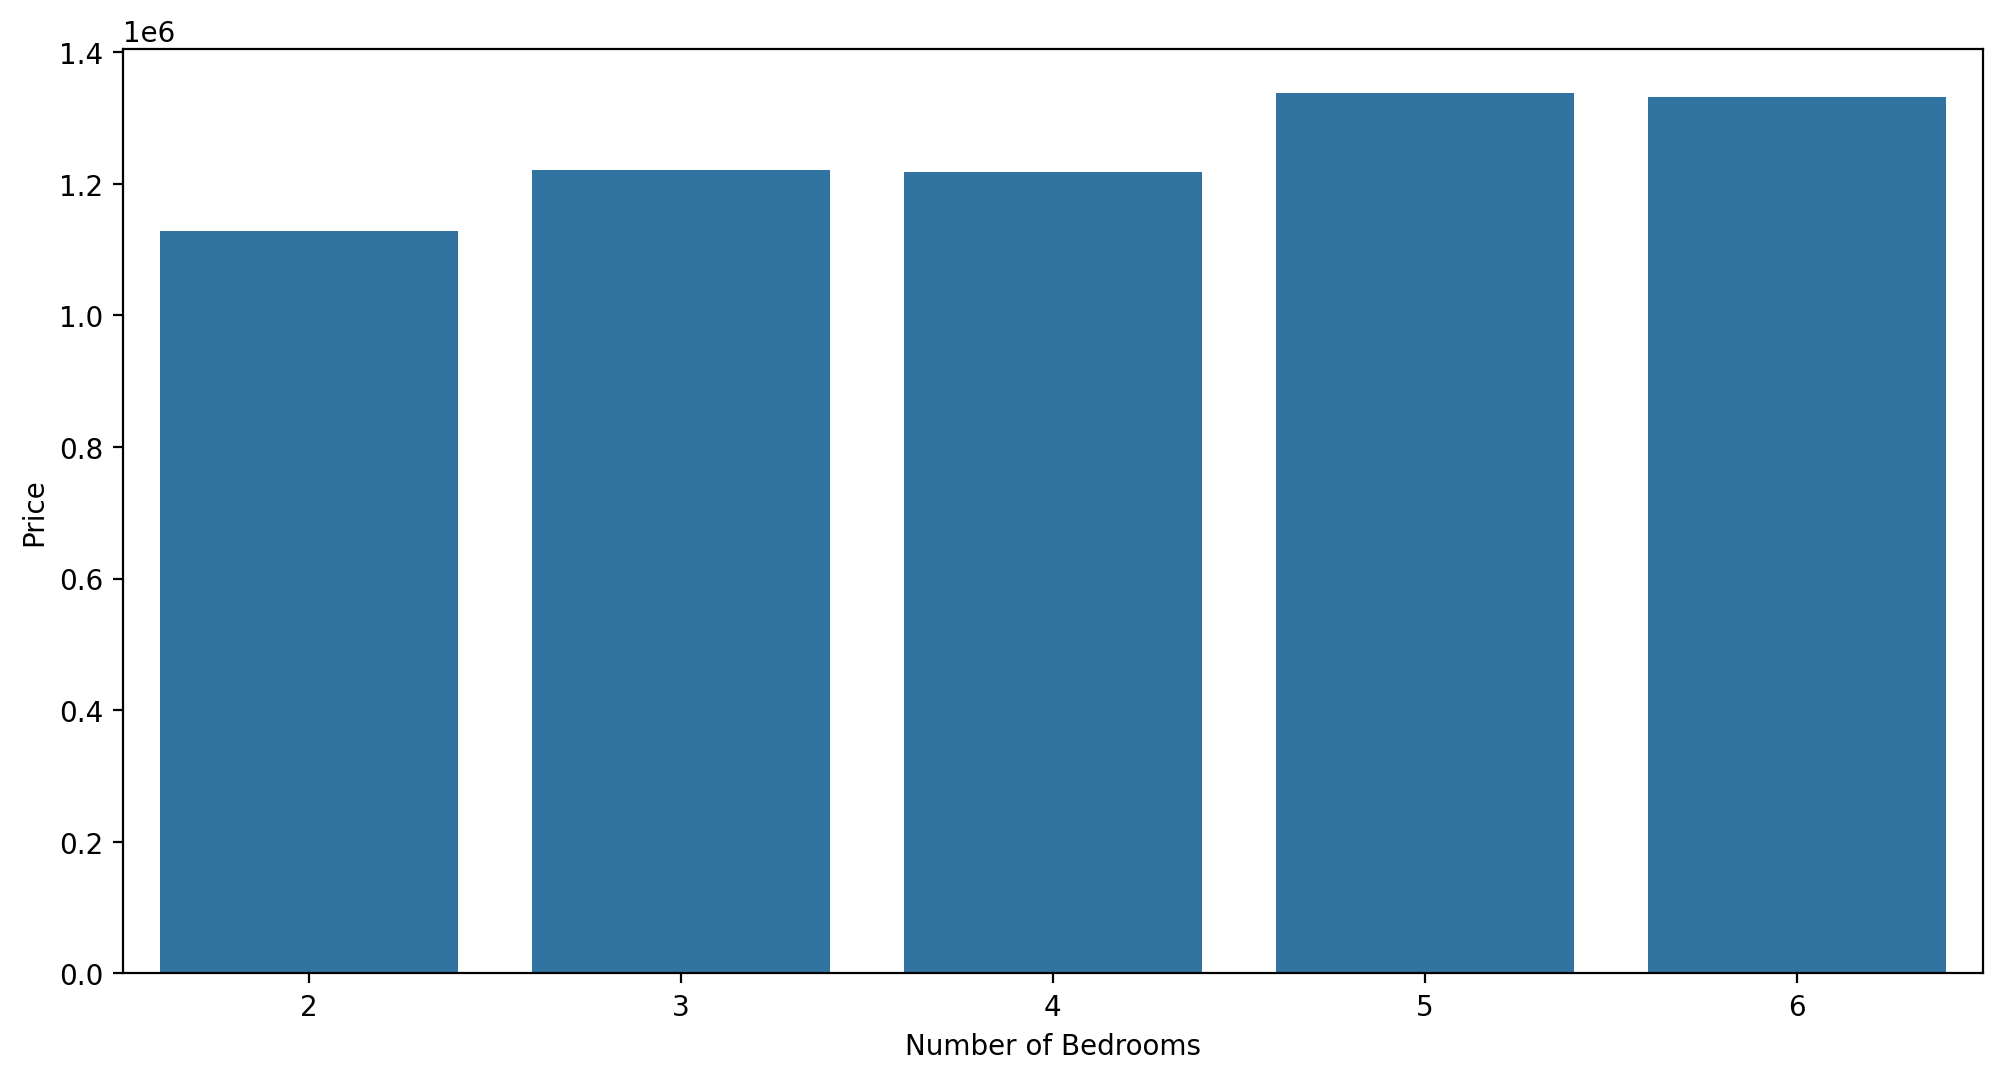

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

In [ ]:

results = {}

___

### Обучение модели

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [24]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [25]:
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

___

### Линейная регрессия

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [30]:
lrm.intercept_

np.float64(-2638673.4261914166)

In [31]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [ ]:
predictions_lr = lrm.predict(X_test)

In [45]:
predictions_lr

array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
       1457119.79297241, 1483428.95309368, 1047510.59737176],
      shape=(1500,))

In [34]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

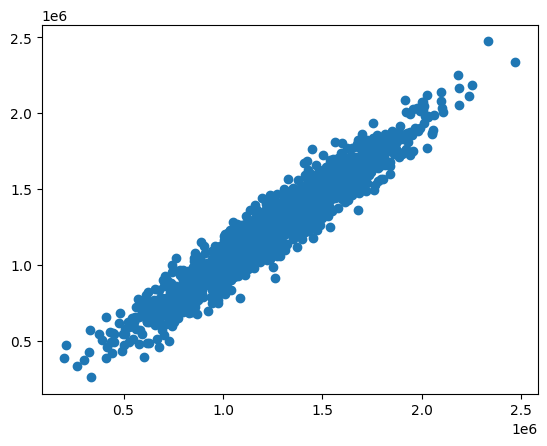

In [35]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

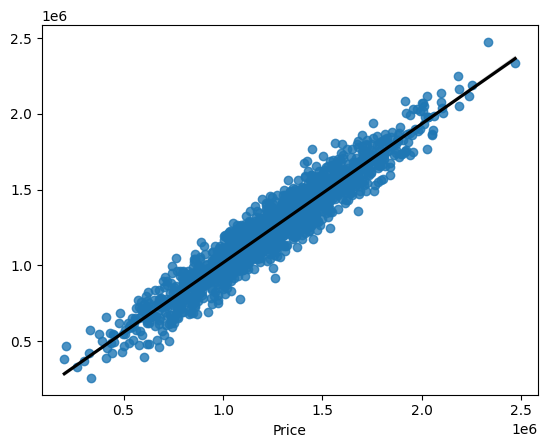

In [36]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

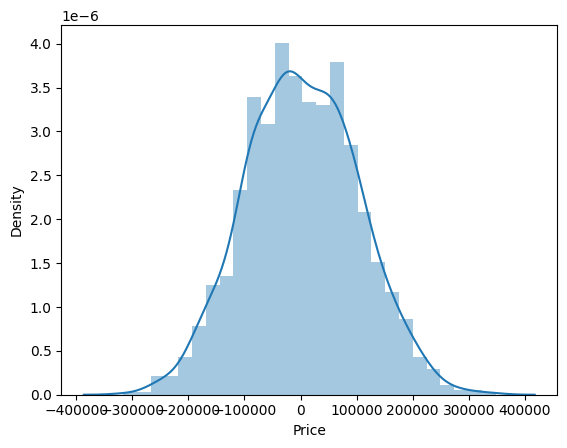

In [37]:
sns.distplot((y_test - predictions))

In [54]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae_lr = mean_absolute_error(y_test, predictions_lr)
mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, predictions_lr)

In [56]:
print(f"\nМетрики линейной регрессии:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")


Метрики линейной регрессии:
MAE: 81135.57
MSE: 10068422551.40
RMSE: 100341.53
R² Score: 0.9147


Модель хорошо соответствует данным (высокий R2), ошибки в пределах 8-10% от средней цены а также MAE и RMSE близки по значению, что говорит об отсутствии выбросов с экстремальными ошибками

In [ ]:
results['Linear Regression'] = {
    'MAE': mae_lr,
    'MSE': mse_lr,
    'RMSE': rmse_lr,
    'R2': r2_lr,
}

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

In [62]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
predictions_rf = rf_model.predict(X_test)

Text(0.5, 1.0, 'Random Forest: факт vs предсказание')

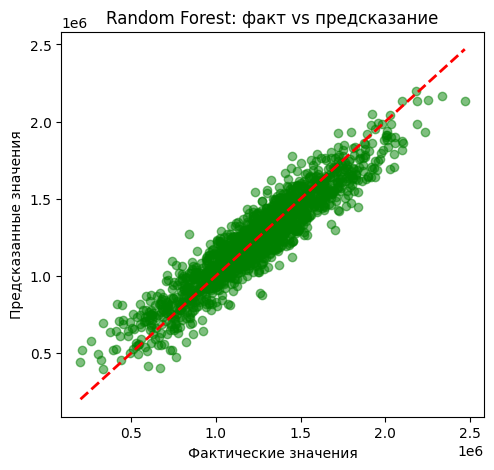

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Random Forest: факт vs предсказание')

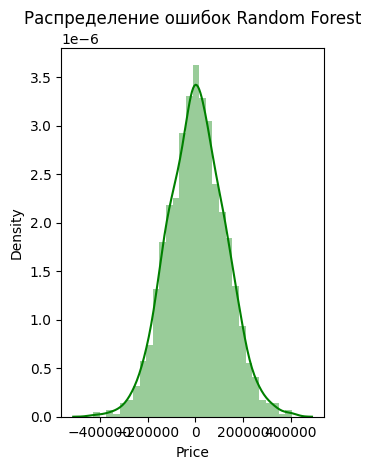

In [ ]:
plt.subplot(1, 2, 2)
sns.distplot((y_test - predictions_rf), color='green')
plt.title('Распределение ошибок Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВажность признаков:")
print(feature_importance)



Важность признаков:
                        feature  importance
0              Avg. Area Income      0.4441
1           Avg. Area House Age      0.2386
4               Area Population      0.1860
2     Avg. Area Number of Rooms      0.1191
3  Avg. Area Number of Bedrooms      0.0121


### Влияние на цену:
Экономика (доход, население): 63%

Характеристики дома: 36%

Спальни: минимально

Доход > спален в 36 раз



In [ ]:
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, predictions_rf)

In [69]:
print(f"\nMAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


MAE: 94932.96
MSE: 14444030079.95
RMSE: 120183.32
R² Score: 0.8776


Модель Random Forest показала худшие результаты, чем линейная регрессия

In [ ]:
results['Random Forest'] = {
    'MAE': mae_rf,
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'R2': r2_rf,
}

### Настроим random forest с помощью поиск гиперпараметров

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [99]:
rf_random = RandomForestRegressor(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf_random,
    param_distributions=param_dist,
    n_iter=50,  
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [101]:
print("Запуск случайного поиска гиперпараметров...")
random_search.fit(X_train, y_train)

Запуск случайного поиска гиперпараметров...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000174F36AC810>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000174EE1533D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000174F1B4EA10>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [102]:
print("\nЛучшие параметры из RandomizedSearchCV:")
best_params_random = random_search.best_params_
for param, value in best_params_random.items():
    print(f"  {param}: {value}")


Лучшие параметры из RandomizedSearchCV:
  bootstrap: True
  max_depth: 15
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 99


In [ ]:
best_rf_random = random_search.best_estimator_

predictions_best_rf_random = best_rf_random.predict(X_test)

mae_best_rf_random = mean_absolute_error(y_test, predictions_best_rf_random)
mse_best_rf_random = mean_squared_error(y_test, predictions_best_rf_random)
rmse_best_rf_random = np.sqrt(mse_best_rf_random)
r2_best_rf_random = r2_score(y_test, predictions_best_rf_random)

In [104]:
print(f"\nМетрики Random Forest после RandomizedSearchCV:")
print(f"MAE: {mae_best_rf_random:.2f}")
print(f"MSE: {mse_best_rf_random:.2f}")
print(f"RMSE: {rmse_best_rf_random:.2f}")
print(f"R² Score: {r2_best_rf_random:.4f}")



Метрики Random Forest после RandomizedSearchCV:
MAE: 96680.77
MSE: 14986823360.85
RMSE: 122420.68
R² Score: 0.8730


**До настройки:**

R² 0.8776, RMSE 120,183, MAE 94,933

**После настройки (RandomizedSearchCV):**

R² 0.8730 (хуже на 0.46%), RMSE 122,421 (больше на 2,238), MAE = 96,681 (больше на 1,748)

**После настройки результаты лучше не стали, значит Random forest просто плох для задачи**

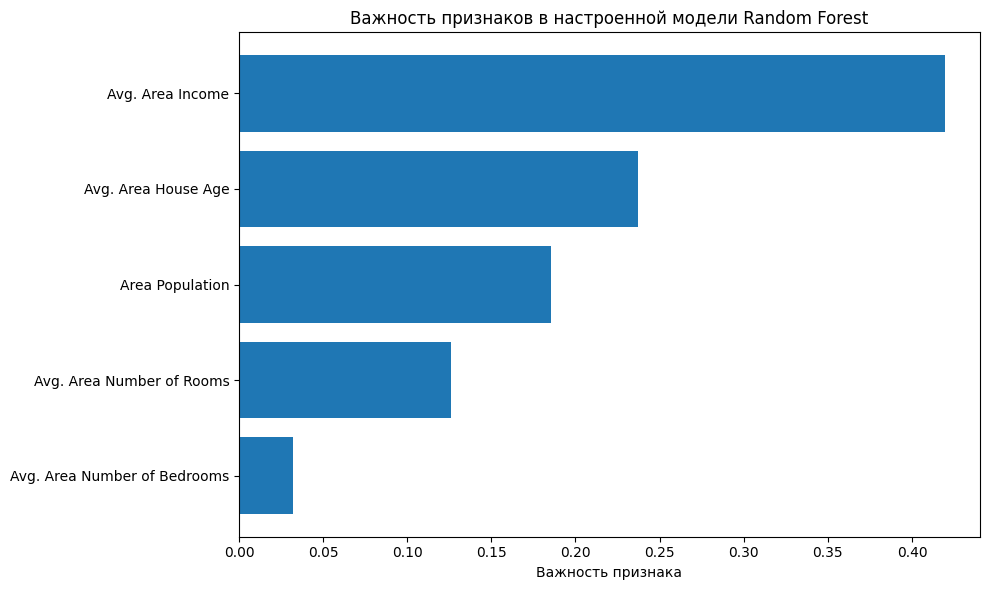

In [ ]:
plt.figure(figsize=(10, 6))
feature_importance_random = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_random.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance_random['feature'], feature_importance_random['importance'])
plt.xlabel('Важность признака')
plt.title('Важность признаков в настроенной модели Random Forest')
plt.tight_layout()
plt.show()

### Нейронные сети

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def create_nn_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1) 
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    return model

In [ ]:
nn_model = create_nn_model()

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [ ]:
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

In [ ]:
predictions_nn = nn_model.predict(X_test_scaled).flatten()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 1.0, 'Нейронная сеть: факт vs предсказание')

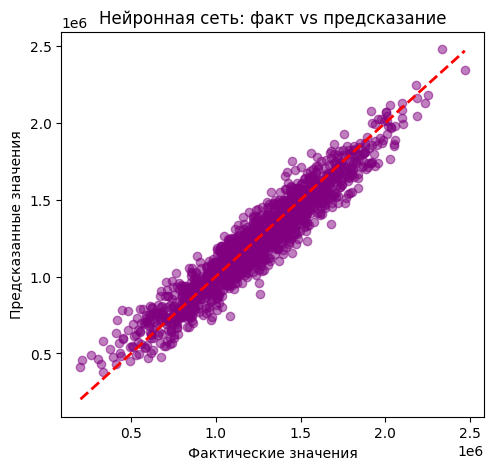

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_nn, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Нейронная сеть: факт vs предсказание')

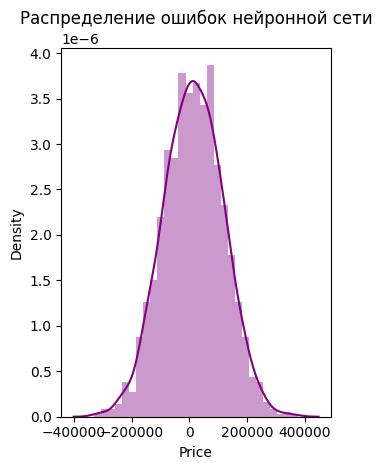

In [ ]:
plt.subplot(1, 2, 2)
sns.distplot((y_test - predictions_nn), color='purple')
plt.title('Распределение ошибок нейронной сети')
plt.tight_layout()
plt.show()

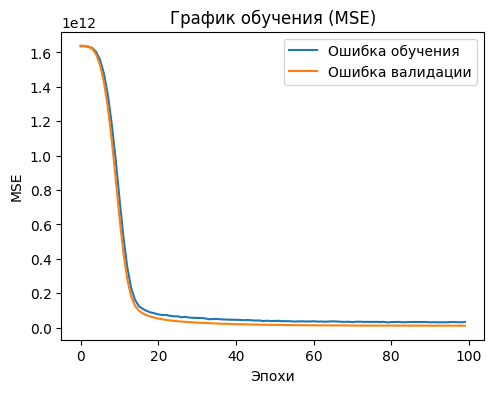

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Ошибка обучения')
plt.plot(history.history['val_loss'], label='Ошибка валидации')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.title('График обучения (MSE)')
plt.legend()

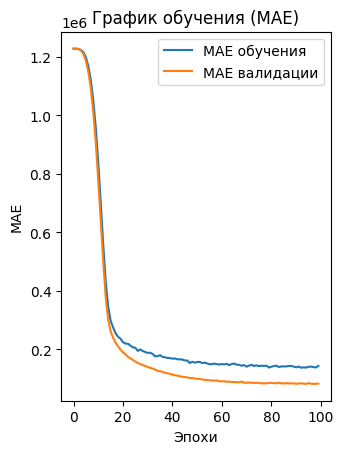

In [80]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE обучения')
plt.plot(history.history['val_mae'], label='MAE валидации')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.title('График обучения (MAE)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mae_nn = mean_absolute_error(y_test, predictions_nn)
mse_nn = mean_squared_error(y_test, predictions_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, predictions_nn)

In [83]:
print(f"\nMAE: {mae_nn:.2f}")
print(f"MSE: {mse_nn:.2f}")
print(f"RMSE: {rmse_nn:.2f}")
print(f"R² Score: {r2_nn:.4f}")
print(f"Количество эпох: {len(history.history['loss'])}")


MAE: 83272.26
MSE: 10796265242.80
RMSE: 103905.08
R² Score: 0.9085
Количество эпох: 100


Нейронная сеть показала похожие результаты с линейной регрессией, но немного хуже:

R² 0.9085 - Хуже на 0.6% чем линейная регрессия (0.9147), но лучше чем Random Forest (0.8776)

RMSE 103,905 - Ошибка на ~3,500 больше чем у линейной регрессии

MAE 83,272 - Хуже на ~2,100 чем у линейной регрессии

In [85]:
# Сохраняем результаты
results['Neural Network'] = {
    'MAE': mae_nn,
    'MSE': mse_nn,
    'RMSE': rmse_nn,
    'R2': r2_nn,
}

### Сравнение моделей

In [ ]:
# Создаем датафрейм для сравнения
comparison_df = pd.DataFrame(results).T

print("\nСравнение метрик:")
print(comparison_df.round(4))


Сравнение метрик:
                         MAE              MSE        RMSE     R2
Linear Regression 81135.5661 10068422551.4011 100341.5295 0.9147
Random Forest     94932.9606 14444030079.9527 120183.3186 0.8776
Neural Network    83272.2572 10796265242.7958 103905.0780 0.9085


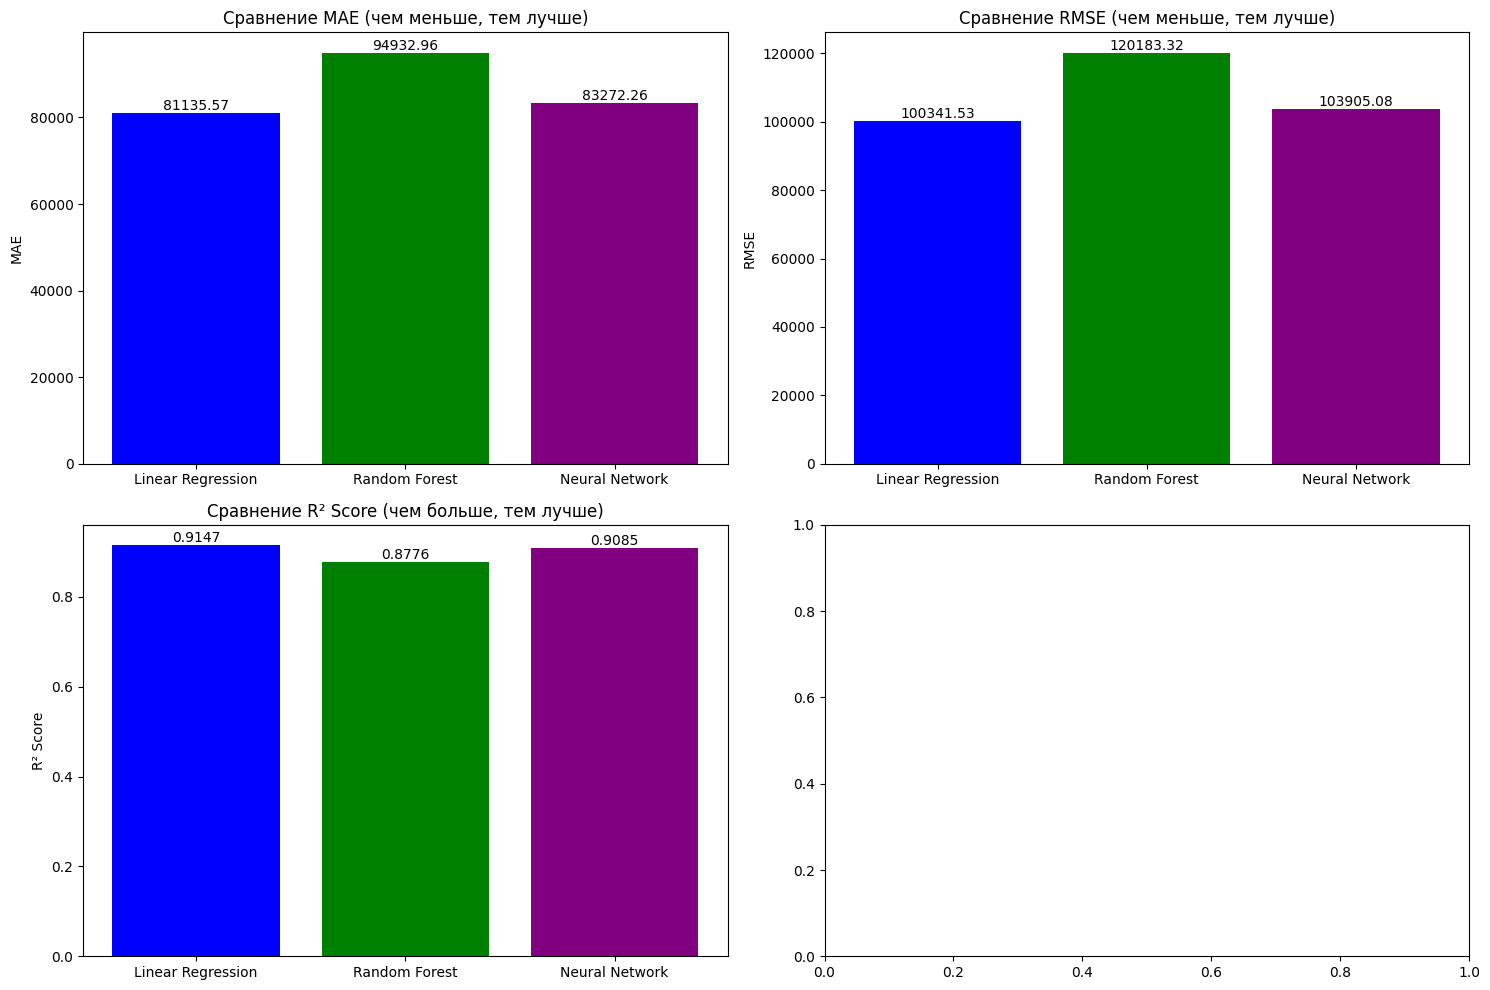

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].bar(comparison_df.index, comparison_df['MAE'], color=['blue', 'green', 'purple'])
axes[0, 0].set_title('Сравнение MAE (чем меньше, тем лучше)')
axes[0, 0].set_ylabel('MAE')
for i, v in enumerate(comparison_df['MAE']):
    axes[0, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')
axes[0, 1].bar(comparison_df.index, comparison_df['RMSE'], color=['blue', 'green', 'purple'])
axes[0, 1].set_title('Сравнение RMSE (чем меньше, тем лучше)')
axes[0, 1].set_ylabel('RMSE')
for i, v in enumerate(comparison_df['RMSE']):
    axes[0, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')
axes[1, 0].bar(comparison_df.index, comparison_df['R2'], color=['blue', 'green', 'purple'])
axes[1, 0].set_title('Сравнение R² Score (чем больше, тем лучше)')
axes[1, 0].set_ylabel('R² Score')
for i, v in enumerate(comparison_df['R2']):
    axes[1, 0].text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

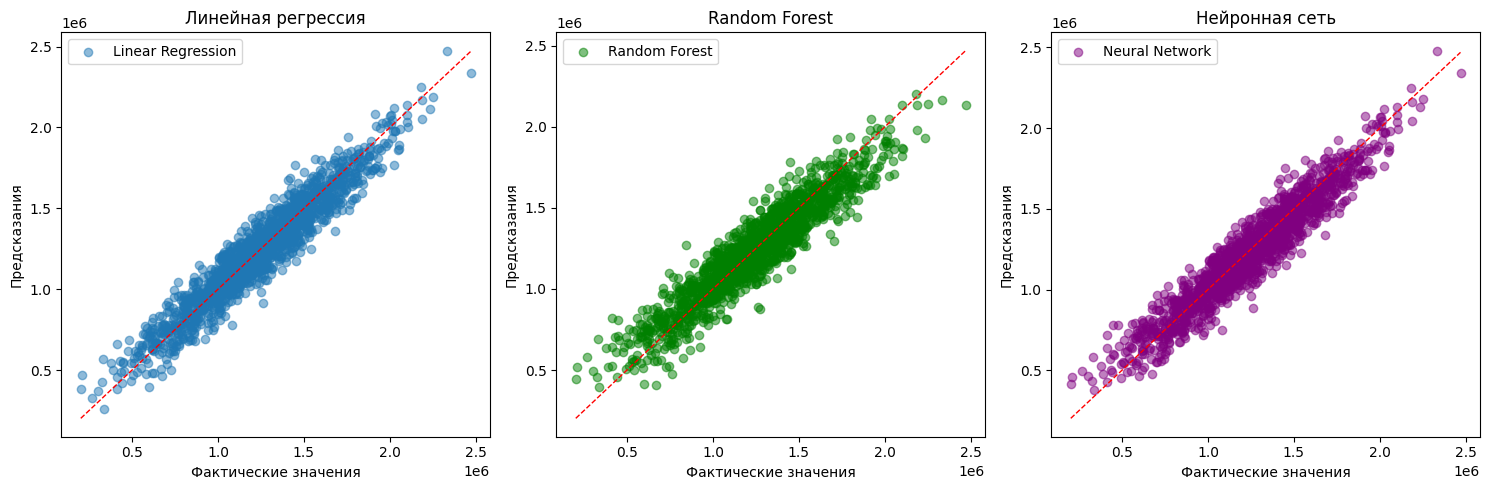

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, predictions_lr, alpha=0.5, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
plt.title('Линейная регрессия')
plt.legend()
plt.subplot(1, 3, 2)
plt.scatter(y_test, predictions_rf, alpha=0.5, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
plt.title('Random Forest')
plt.legend()
plt.subplot(1, 3, 3)
plt.scatter(y_test, predictions_nn, alpha=0.5, color='purple', label='Neural Network')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
plt.title('Нейронная сеть')
plt.legend()
plt.tight_layout()
plt.show()

### Вывод

## Сравнение моделей

Для прогнозирования цен на жильё были протестированы три модели машинного обучения.

- **Линейная регрессия**: R² = 0.9147, RMSE = 100 341  
- **Нейронная сеть**: R² = 0.9085, RMSE = 103 905  
- **Random Forest**: R² = 0.8730, RMSE = 122 421  

Линейная регрессия показала наилучшие результаты, что указывает на линейный характер данных.

---

## Важность признаков (Random Forest)

- Средний доход — **44.4%**
- Возраст домов — **23.9%**
- Население района — **18.6%**
- Количество спален — **1.2%**

---

## Итог

Линейная регрессия является оптимальной моделью для данной задачи. Средняя ошибка прогнозирования составляет около **8%**, модель готова к практическому использованию.
